In [53]:
import ipynb.fs.full.preProcessing as preProcess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import json
import seaborn as sns


Overall correlation: 
[[1.         0.97560368]
 [0.97560368 1.        ]]


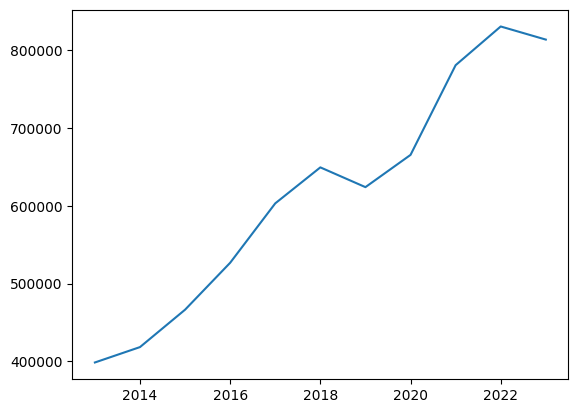

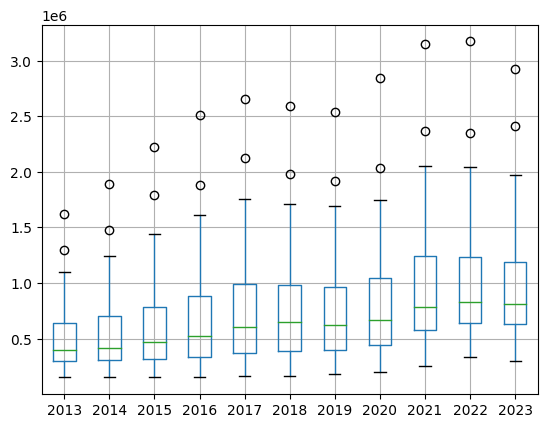

alpine 0.9318328271576923
ballarat 0.9754021603989012
banyule 0.9610703816046463
basscoast 0.9445221528172084
bawbaw 0.974026375020985
bayside 0.9375630932509245
benalla 0.9383275729445316
boroondara 0.9249531992969966
brimbank 0.9599743718923477
campaspe 0.9230059251937328
cardinia 0.9827152729824793
casey 0.9791116823782523
centralgoldfields 0.904711670058307
colacotway 0.9731902281317015
darebin 0.9510880414576748
eastgippsland 0.9383084453825546
frankston 0.9700758088198992
gleneira 0.9250026351996868
glenelg 0.897635953531084
greaterbendigo 0.9095984269686046
greaterdandenong 0.9446552359277812
greatergeelong 0.9681327351858448
greatershepparton 0.9459085278841044
hobsonsbay 0.9507880932680587
horsham 0.9133843849721108
hume 0.9537054132697864
kingston 0.9414150049157305
knox 0.9508346846212995
latrobe 0.9008008877359409
macedonranges 0.9637298266579285
manningham 0.9237020978640715
maribyrnong 0.9124722477770719
maroondah 0.9542333682015894
melbourne 0.8855155522008632
melton 0.9

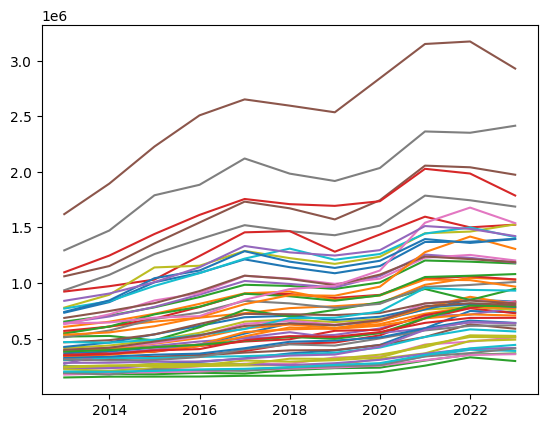

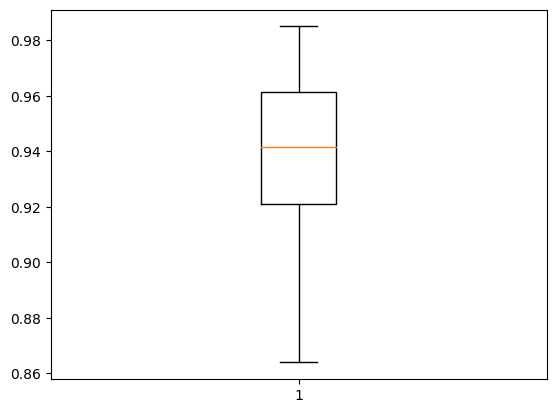

In [54]:
# EDA Housing price + Trend Analysis:
# All housing price has an increasing trend over-time, with high
# correlation coeff, showing a linear trend (or due to minimal points)
# Minimum coefficient: 0.7969 for Westwimmera (the rest is overall above 90)

# Outlier points: There are variation and sometimes almost curving.
# Difficult to tell due to only 10 data points. Stands out for Moirra 2022.

# Distribution across LGA: Skewed, shown in box plot, with upper extremes

# Group by LGA and take average price
housingPriceGroup = preProcess.cleanedHousingPrice

# Check trend
x_axis = np.array([i for i in range(2013, 2024)])
print("Overall correlation: ")
print(np.corrcoef(x_axis, housingPriceGroup.mean()))
plt.figure()
plt.plot(x_axis, housingPriceGroup.median())
plt.show()

# Check distribution of housing price across LGA for each year
plt.figure()
# plt.boxplot([housingPriceGroup[str(i)] for i in range(2013, 2024)])
housingPriceGroup.boxplot(column=[str(i) for i in range(2013, 2024)])
plt.show()

all_corr = []
plt.figure()
for lga in housingPriceGroup.index:
    corr = np.corrcoef(x_axis, housingPriceGroup.loc[lga])[0][1]
    print(lga, corr)
    all_corr.append(corr)

    # Use plt.figure() to plot for each housing on different figure
    plt.plot(x_axis, housingPriceGroup.loc[lga])

    # Use the below to plot linear trend
    # m, b = np.polyfit(x_axis, housingPriceGroup.loc[lga], 1)
    # plt.plot(x_axis, m * x_axis + b)
plt.show()

plt.figure()
plt.boxplot(all_corr)
plt.show()


Overall correlation: 
[[ 1.         -0.30947825]
 [-0.30947825  1.        ]]


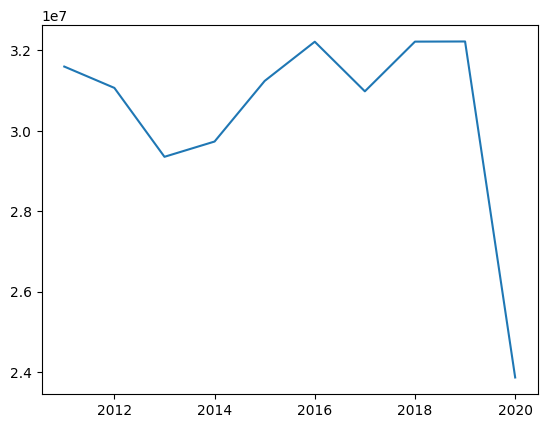

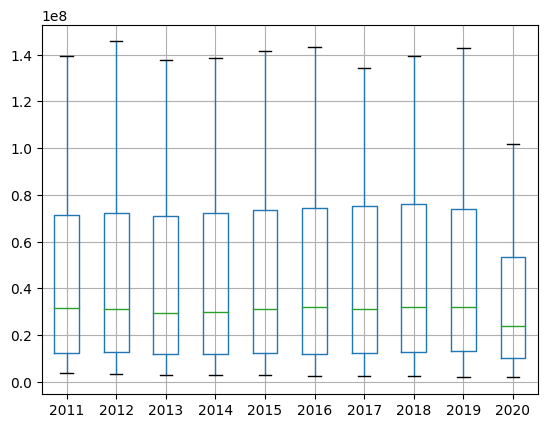

whittlesea 0.04761322938200142
northerngrampians -0.8518988503721039
greatergeelong -0.3907909315855411
colacotway -0.613263867286729
moorabool 0.17749984163788546
centralgoldfields -0.6992628714296889
mitchell 0.2348334292616106
alpine -0.9596758676945008
benalla 0.5463265770046716
campaspe 0.2924894274079077
glenelg -0.6745413842378463
wellington -0.7728893316738793
wodonga -0.4120921583236482
greaterbendigo -0.12855612035640362
ballarat -0.36947971086130105
swanhill 0.26802031995116105
greatershepparton 0.03196538412559459
mildura 0.32644735608112285
eastgippsland -0.1927103853150085
basscoast -0.46469707393461485
latrobe -0.6236734852421043
surfcoast -0.3334740346932587
southgippsland -0.6269369740169284
macedonranges -0.3596220899071647
horsham -0.37954181347388327
bawbaw 0.6042573845762607
wangaratta 0.026240971337788643
melbourne 0.32693412398989147
merribek -0.7211688387954382
darebin -0.704780465380674
boroondara -0.46320087448171704
whitehorse -0.578078988028986
manningham -0

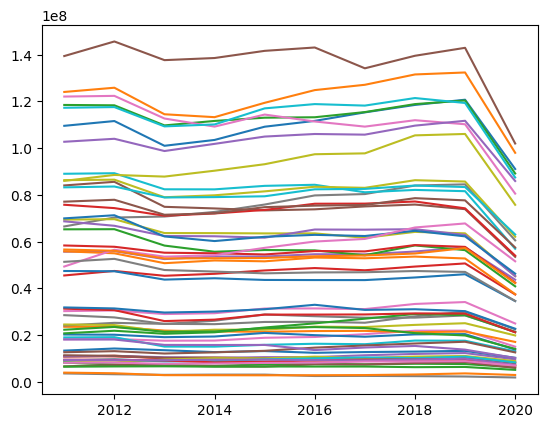

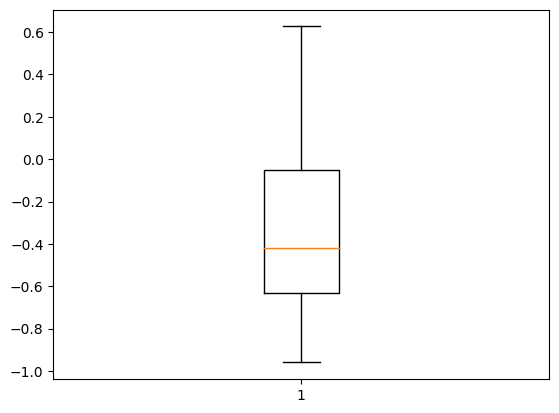

In [55]:
# EDA EGM
# Outlier: Sharp drop in 2020 (due to Covid 19)
# Across time: No clear linear relationship overall with total media, 
# and the linear trend varies widely between different LGA (covering from -1 to 1 without 2020
# and -1 to 0.6 with 2020).
# Across LGA: Skewed toward the higher extreme, but with no outliers 

egmGroup = preProcess.cleanedEgm

# Check trend. Change to (2011, 2020) to ignore the 2020 outlier.
x_axis = np.array([i for i in range(2011, 2021)])

plt.figure()
print("Overall correlation: ")
print(np.corrcoef(x_axis, egmGroup.median()[:len(x_axis)]))
plt.plot(x_axis, egmGroup.median()[:len(x_axis)])
plt.show()

# Check distribution of housing price across LGA for each year
plt.figure()
egmGroup.boxplot(column=[str(i) for i in x_axis])
plt.show()

all_corr = []
plt.figure()
for lga in egmGroup.index:
    corr = np.corrcoef(x_axis, egmGroup.loc[lga][:len(x_axis)])[0][1]
    print(lga, corr)
    all_corr.append(corr)

    # Use plt.figure() to plot for each housing on different figure
    # plt.figure()
    plt.plot(x_axis, egmGroup.loc[lga][:len(x_axis)])

    # Linear model is not a good fit with the 2020 drop, so uncomment this to plot
    # the linear fit (useless though)
    # m, b = np.polyfit(x_axis, egmGroup.loc[lga][:len(x_axis)], 1)
    # plt.plot(x_axis, m * x_axis + b)
    
    # plt.show()

plt.show()

plt.figure()
plt.boxplot(all_corr)
plt.show()



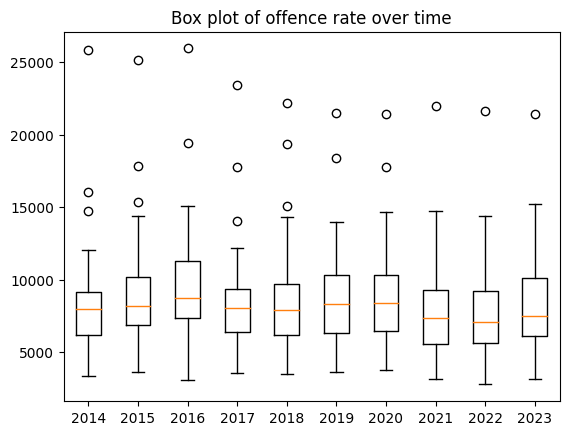

Overall coefficient
[[ 1.        -0.6275269]
 [-0.6275269  1.       ]]


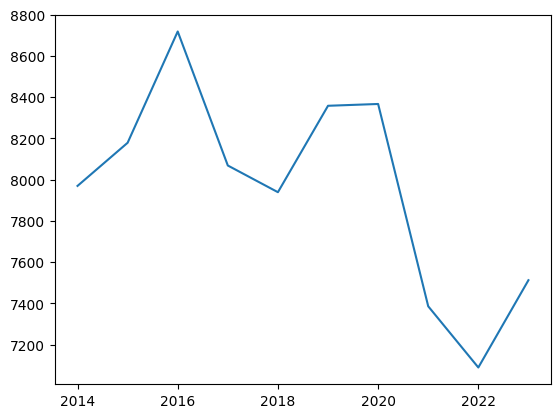

banyule -0.7435998951602791
brimbank -0.19958648776423563
darebin -0.7200070216208568
hobsonsbay -0.8617779059182076
hume -0.832350447815227
maribyrnong 0.1448361833561788
melbourne -0.8806088153726506
melton -0.6774853015236196
merribek -0.708319674644351
mooneevalley -0.85415573821093
whittlesea -0.7770194134105095
wyndham -0.6992425714103824
yarra -0.7508748538483996
alpine 0.24317347932967506
basscoast -0.5886625788586605
bawbaw -0.297406913192657
benalla 0.353606866699459
boroondara 0.30914614058982753
eastgippsland 0.8065436771342204
greatershepparton 0.561268243132229
knox -0.21096800297951
latrobe -0.5542772910683488
manningham -0.26309767392589456
maroondah -0.6298447391061289
mitchell -0.5142403229646098
monash 0.6731102790696738
southgippsland 0.9185400432406692
wangaratta -0.02722552909693768
wellington 0.202449470533715
whitehorse 0.38504645694966316
wodonga 0.2856181471475863
yarraranges -0.34422768920167635
bayside 0.43672384089729843
cardinia -0.6909520863171269
casey -

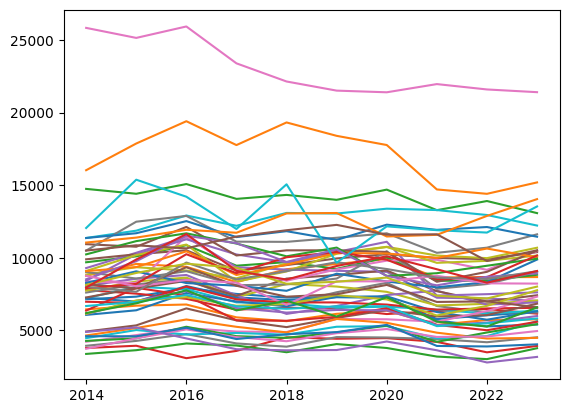

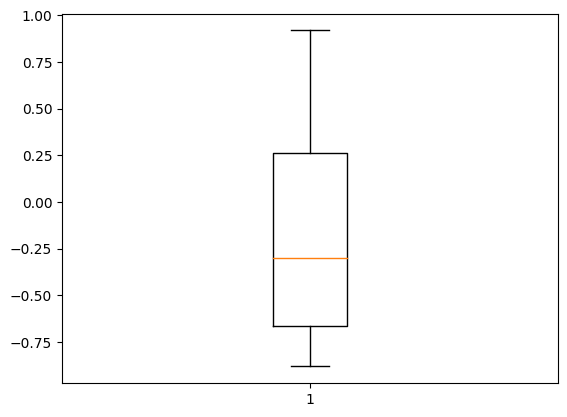

In [56]:
# EDA Offence rate
# Across LGA in each year: Slightly skewed to higher extreme, with several outliers.
# melbourne is the only place with extremely high offence rate > 20,000 all year (need to check if it's 
# city or the region, since the population is higher than expected)

# Across time: Sharp drop in 2021, 2022 (might be due to covid19), 
# with overall down trend. Excluding the drop in 2021, no significant trend in overall median,
# and across each lga, with the correlation coefficient spanning (-0.75, near 1)

offences = preProcess.cleanedOffences

allYear = offences["Year"].unique()[::-1]

# Group by time and check the median rate
yearGroup = [offences[offences["Year"] == year]["Rate per 100,000 population"] for year in allYear]

plt.figure()
plt.title("Box plot of offence rate over time")
plt.boxplot(yearGroup)
plt.xticks([i for i in range(1, len(allYear) + 1)], allYear)
plt.show()

plt.figure()
print("Overall coefficient")
print(np.corrcoef(allYear, [np.median(group) for group in yearGroup]))
plt.plot(allYear, [np.median(group) for group in yearGroup])
plt.show()

all_corr = []
plt.figure()
for lga in offences["LGA"].unique():
    lgaYear = [offences[(offences["LGA"] == lga)
                        & (offences["Year"] == year)]["Rate per 100,000 population"].iloc[0] for year in allYear]
    corr = np.corrcoef(allYear, lgaYear)[0][1]
    print(lga, corr)
    all_corr.append(corr)

    # Use plt.figure() to plot for each housing on different figure
    # plt.figure()
    plt.plot(allYear, lgaYear)

    # Use the below and mode 'o' above for scatter plot with best fit line
    # m, b = np.polyfit(allYear, lgaYear, 1)
    # plt.plot(allYear, m * allYear + b)
    # plt.show()
plt.show()


plt.figure()
plt.boxplot(all_corr)
plt.show()


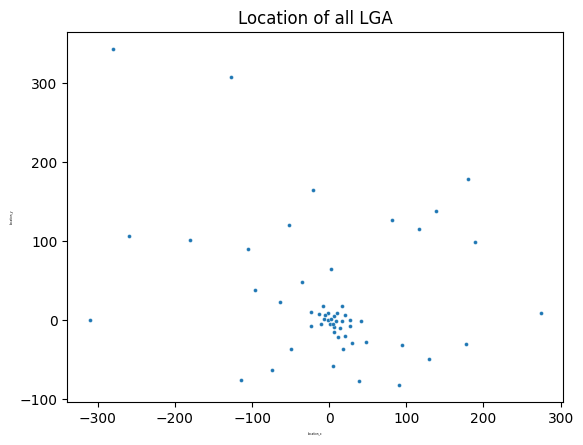

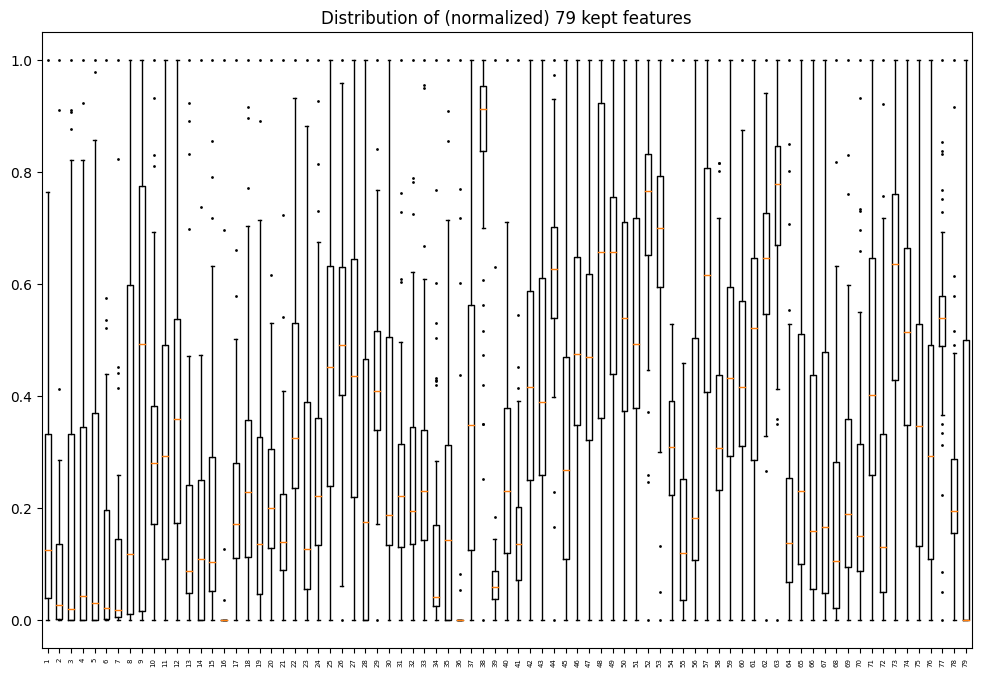

<Figure size 640x480 with 0 Axes>

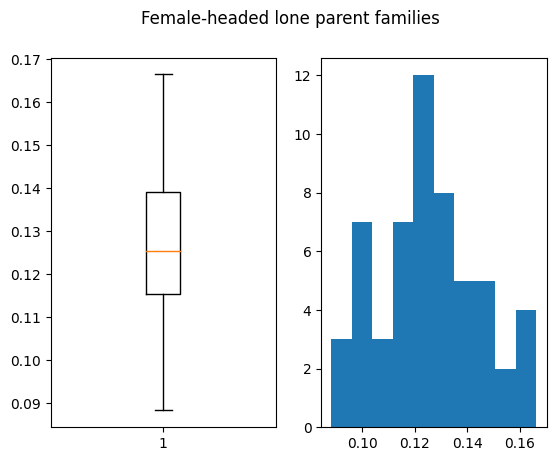

<Figure size 640x480 with 0 Axes>

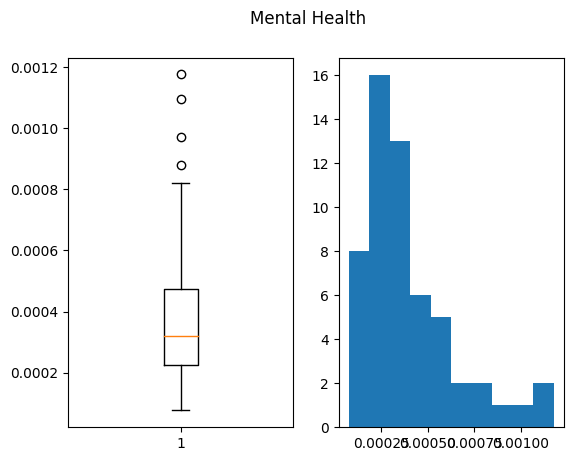

<Figure size 640x480 with 0 Axes>

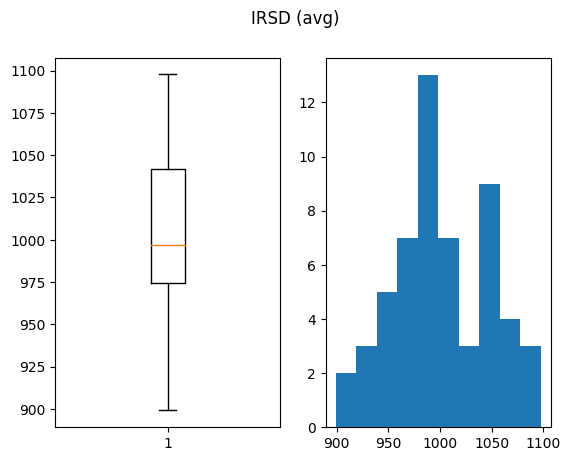

<Figure size 640x480 with 0 Axes>

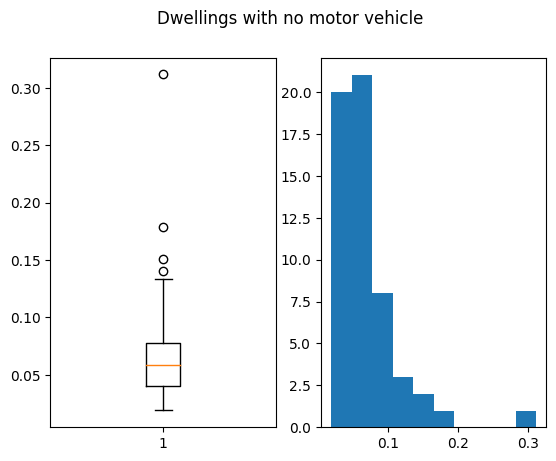

<Figure size 640x480 with 0 Axes>

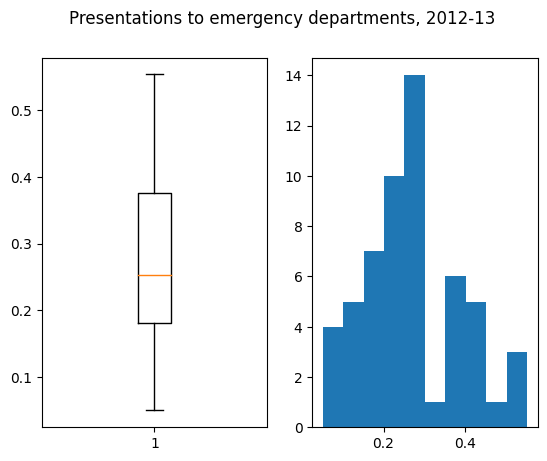

<Figure size 640x480 with 0 Axes>

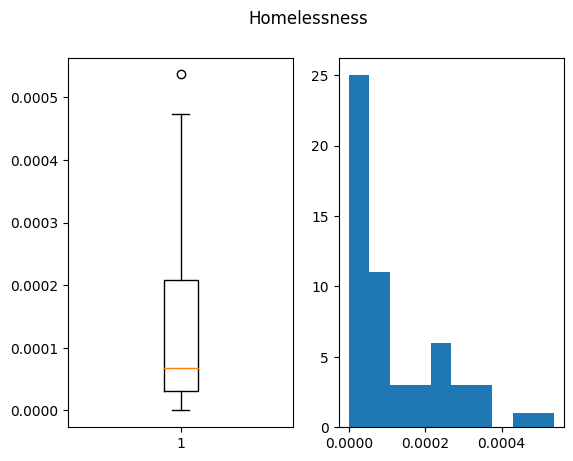

<Figure size 640x480 with 0 Axes>

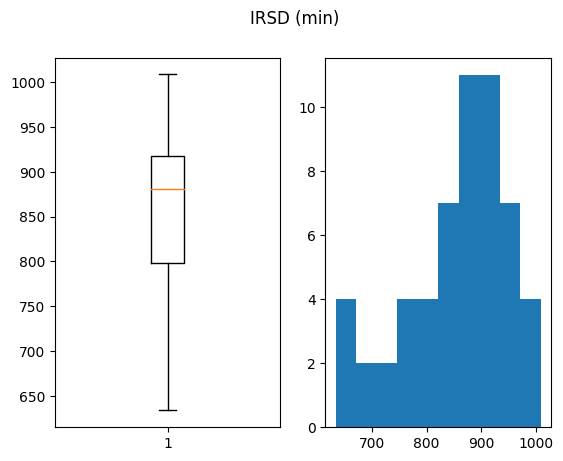

<Figure size 640x480 with 0 Axes>

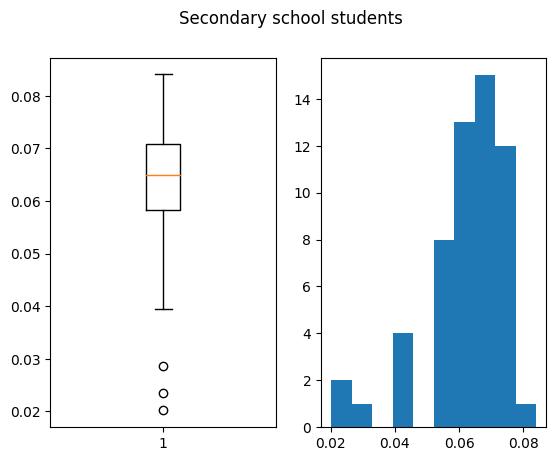

<Figure size 640x480 with 0 Axes>

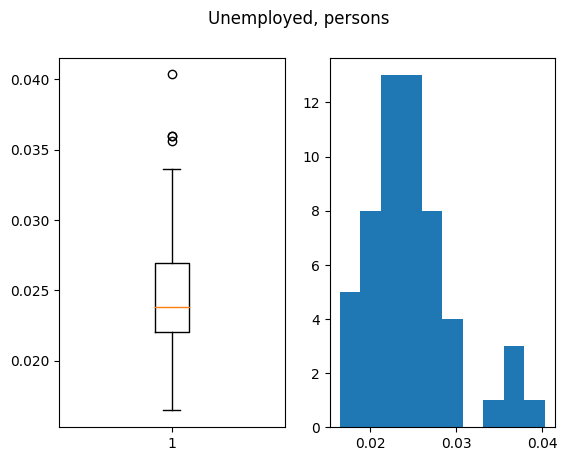

<Figure size 640x480 with 0 Axes>

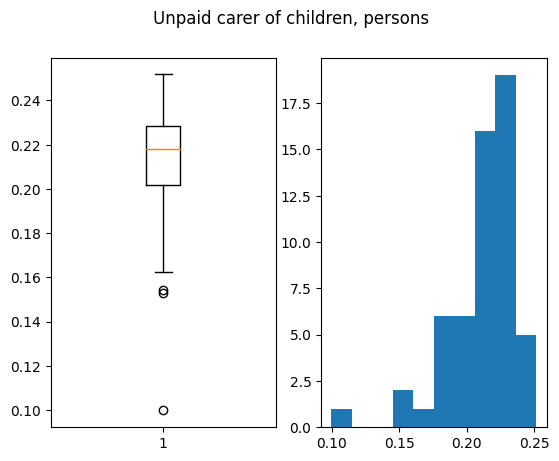

<Figure size 640x480 with 0 Axes>

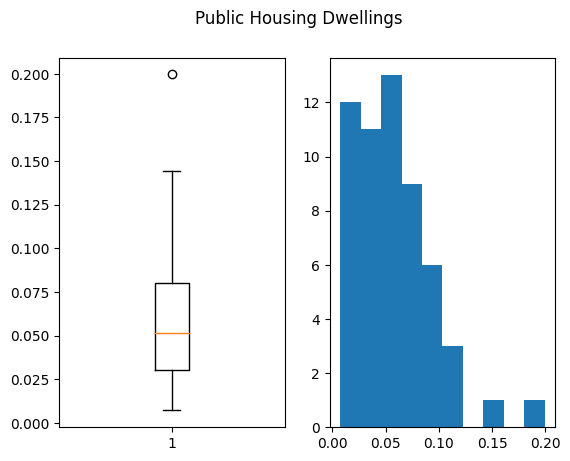

<Figure size 640x480 with 0 Axes>

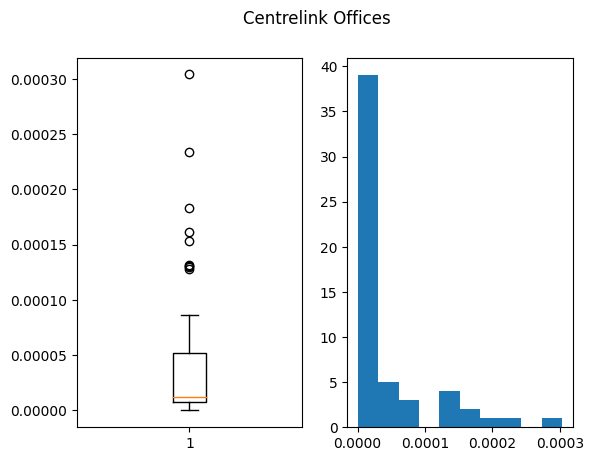

<Figure size 640x480 with 0 Axes>

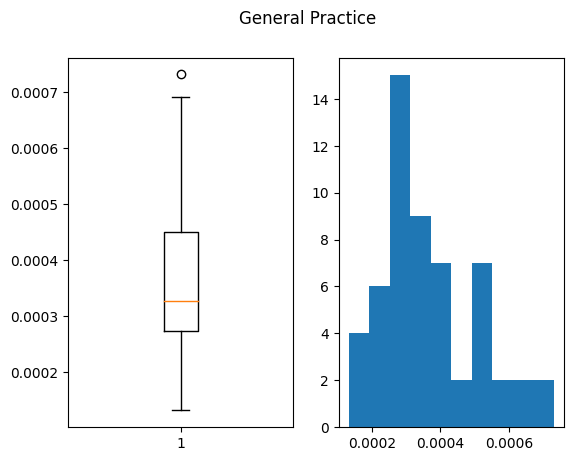

<Figure size 640x480 with 0 Axes>

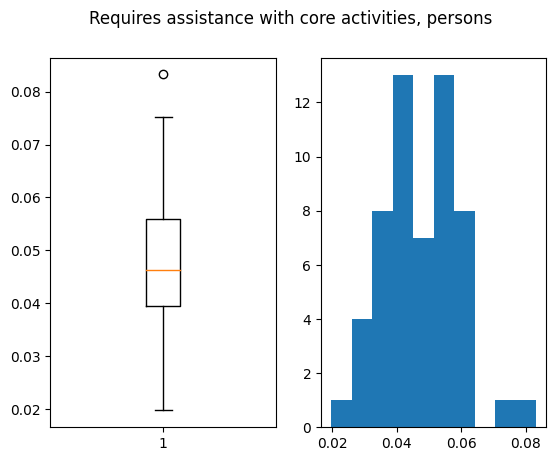

<Figure size 640x480 with 0 Axes>

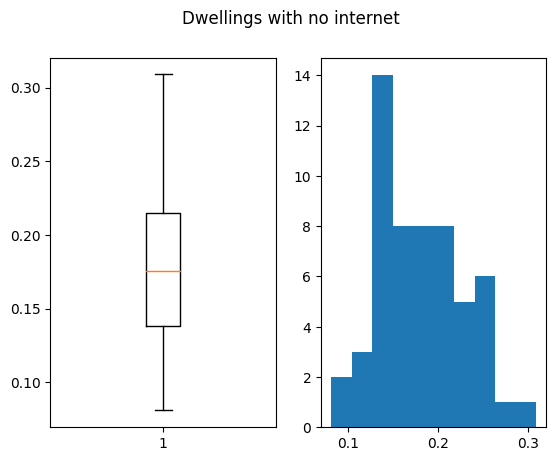

<Figure size 640x480 with 0 Axes>

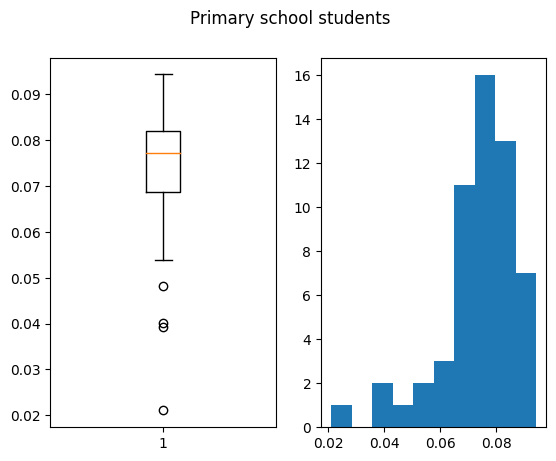

<Figure size 640x480 with 0 Axes>

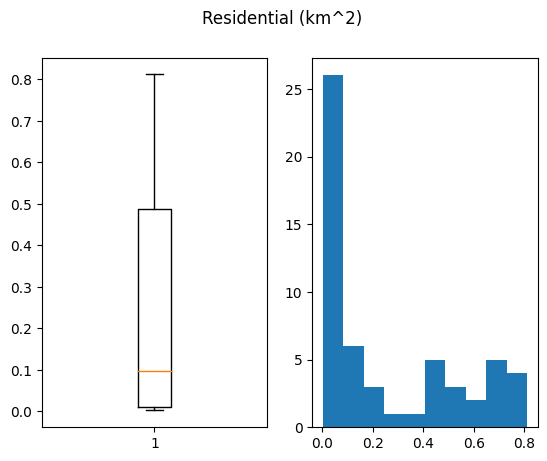

<Figure size 640x480 with 0 Axes>

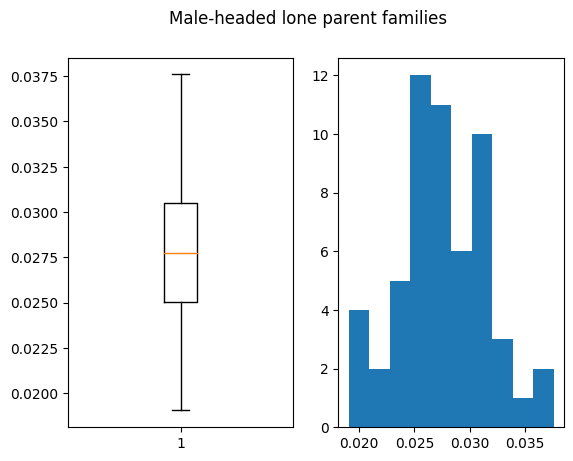

In [71]:
# EDA for communities
# Multiple features: Perhaps should trim it down first with correlation
# analysis for the top 10 (below)

# Overall for all 79 features DISTRIBUTION:
# Plot all 79 box plots of normalized values to have a glimpse with its distribution
# Most are skewed and have outliers, with only few are relatively balanced ("Household < $600"
# and the "Dwellings with internet")

# 2 main types of features:
# Discrete (0 - 4): ABS remoteness category
# Mean per lga (0 - inf): Travel time to nearest hospitals and GPO 
# Weighted Score (depending on scale): "ARIA+ (avg)", "ARIA+ (max)", "ARIA+ (min)", "IRSD (avg)", "IRSD (max)", "IRSD (min)"
# Normalized (0 - 1 for ratio, 0 - inf for others): The rest, which are normalized by dividing by total population, area, 
# dwellings, households, families (listed in preprocessing)


# More focused EDA on the top 10 features filtered by NMI and Corr-coeff
# Not much to do, just plot the box plots and histogram.
# Most of them are skewed, with mostly outliers at the higher extreme (but no specific
# pattern) - only 2 attributes have lower outliers ("Secondary school students", "Primary school students", 
# "Unpaid carer of children, persons")

# Across 2015 - 2015
topNMI = ['IRSD (min)', 'Female-headed lone parent families', 'Public Housing Dwellings', 
          'IRSD (avg)', 'Dwellings with no internet', 'Requires assistance with core activities, persons', 
          'Presentations to emergency departments, 2012-13', 'Male-headed lone parent families', 
          'Centrelink Offices', 'Residential (km^2)']
topCorrCoeff = ['Dwellings with no motor vehicle', 'Public Housing Dwellings', 'IRSD (min)', 
                'Unpaid carer of children, persons', 'Unemployed, persons', 'Mental Health', 
                'Homelessness', 'Primary school students', 'Secondary school students', 'General Practice']

# Location: Average location seems representative of the LGA, with more LGAs
# located near Melbourne
communities = preProcess.cleanedCommunities

# Scatter plot to see the average locations of the LGA
plt.figure()
plt.title("Location of all LGA")
sns.scatterplot(x=communities["Location_x"], y=communities["Location_y"], s=8)
plt.show()

# Plot the normalized value of all 79 features to check distribution
normalizedCommunities = (communities.copy() - communities.min())/ (communities.max() - communities.min())
plt.figure(figsize=(12, 8))
plt.title("Distribution of (normalized) 79 kept features")
plt.boxplot([normalizedCommunities[col].values for col in normalizedCommunities.columns],
            flierprops={'markersize': 1})
plt.xticks(fontsize = 5)
plt.xticks(rotation=90)
plt.show()

# Proper EDA for the 10 top NMI and top CorrCoeff
allImportant = list(set(topCorrCoeff).union(set(topNMI)))

for att in allImportant:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(att)
    axs[0].boxplot(communities[att])
    axs[1].hist(communities[att])
    plt.show()


In [58]:
communities.columns[41]

'Dwellings with no internet'

CORRELATION ANALYSIS

Discretisation technique:
1. K-means clustering: Doesn't make sense, 
since the range is determined not solely on offence rate (eg: 5% is low, given the police budget, etc.),
and there is no reason why lga with the same level of crime rate to cluster on 1 value (eg: if an lga has
high crime rate, it could be 20%, 50%, 90%, etc., no reason why it should cluster near 1 value like 50%)

2. Equal width: Most attributes and the offence rates have outliers, which will affect the width
3. Equal number: Not too realistic, but can stick with for now.
Cannot guarantee equal number if there are repeated value (Warnings received). The one with same value are grouped into 1 group.

In [59]:
# Try using K-means to bin the offence rate
# NOTE: K-means doesn't make sense, but include here a code to check
# from sklearn.cluster import KMeans

# offencesRate = offences["Rate per 100,000 population"].values
# offencesData = offencesRate.reshape(-1, 1)
# kmeans = KMeans(n_clusters=3).fit(offencesData)
# labels = kmeans.labels_

# labels
# sns.scatterplot(x=offencesRate, y=labels, hue=labels)

# print(sum(labels == 0))
# print(sum(labels == 1))
# print(sum(labels == 2))


d:\Python\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\Python\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\Python\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\Python\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\Python\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose widt

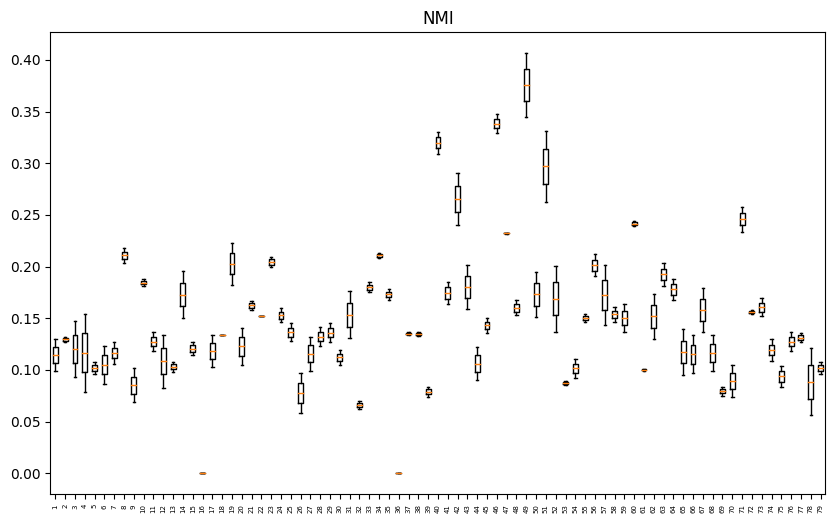

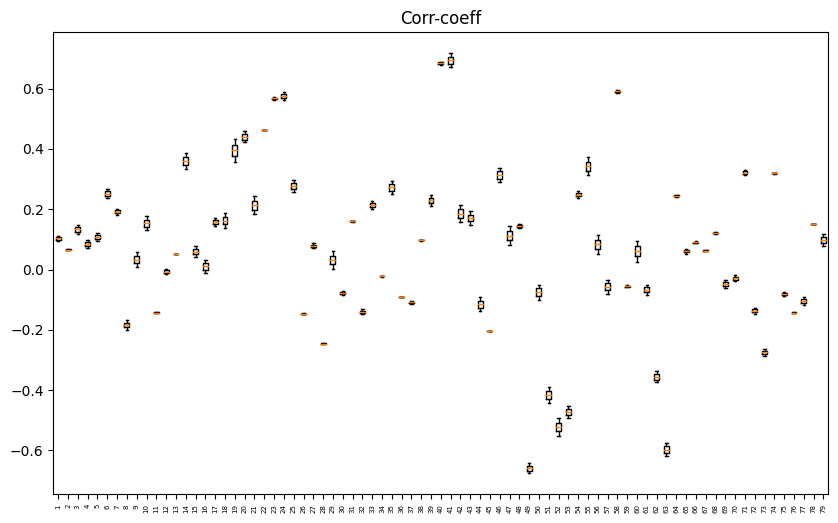

Top 10 NMI
[('IRSD (min)', 0.35984962109977175, -0.6674728658600833), ('Female-headed lone parent families', 0.33364240182336025, 0.3012306473189808), ('Public Housing Dwellings', 0.31437358146263944, 0.6819366756451252), ('IRSD (avg)', 0.2797951888935357, -0.4301631202791121), ('Dwellings with no internet', 0.25288134304992016, 0.1708150201266454), ('Requires assistance with core activities, persons', 0.24038995149539535, 0.04368852387358039), ('Presentations to emergency departments, 2012-13', 0.23982171723707235, 0.3174877489327637), ('Male-headed lone parent families', 0.2321008512704601, 0.0967410800123745), ('Centrelink Offices', 0.20961535515316557, -0.023019730849341013), ('Residential (km^2)', 0.20689402342620528, -0.1919971975428253)]
['IRSD (min)', 'Female-headed lone parent families', 'Public Housing Dwellings', 'IRSD (avg)', 'Dwellings with no internet', 'Requires assistance with core activities, persons', 'Presentations to emergency departments, 2012-13', 'Male-headed lon

,attributes,corrcoef,NMI,year
0,Travel time to GPO (minutes),0.094243,0.129882,2014
1,Travel time to GPO (minutes),0.112495,0.099108,2015
2,Area (km^2),0.065181,0.127078,2014
3,Area (km^2),0.067082,0.131919,2015
4,ARIA+ (min),0.117772,0.147265,2014
...,...,...,...,...
153,Location_x,-0.117691,0.135690,2015
154,Location_y,0.150878,0.121270,2014
155,Location_y,0.150290,0.055949,2015
156,ABS remoteness category,0.076537,0.096379,2014


In [64]:
# TODO: Recheck the binnings
# Correlation analysis of the attributes of communities and crime rate
# (across all year)

# Across each year: Not much difference in terms of NMI and 
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer

communities = preProcess.cleanedCommunities
offences = preProcess.cleanedOffences

attributes = [col for col in communities.columns if col != "LGA"]

# Join the communities and offences table on LGA
communityOffence = pd.merge(left=communities, right=offences, on="LGA")


offenceYears = sorted(communityOffence["Year"].unique())
# Map to 2014 only
offenceYears = [2014, 2015]

scores = {
    "attributes": [],
    "corrcoef": [],
    "NMI": [],
    "year": []
}

# Use the default 5 bins, since there is no particular reason to change it
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")

for col in attributes:
    for year in offenceYears:
        yearDF = communityOffence[communityOffence["Year"] == year]
        offencesData = yearDF["Rate per 100,000 population"]
        attData = yearDF[col]

        scores["attributes"].append(col)
        scores["corrcoef"].append(np.corrcoef(attData, offencesData)[0][1])

        # Except for ABS category which is discrete, the rest need to be binned to compute NMI
        
        # This will just be an estimate if decision tree is appropriate (since the decision tree algorithm
        # has built-in method to deal with continuous (by using std reduction instead of NMI))
        
        # Also decision tree can deal with continuous values (by taking the average of the data at leaf nodes
        # and since the metrics is not NMI anymore, the termination conditions are changed)
        # Might also use random forest


        discreteOffence = discretizer.fit_transform(np.array(offencesData).reshape(-1, 1)).astype(int)
        # Normalize the data and scale by 100 to avoid trouble with binning too small width
        discreteAtt = discretizer.fit_transform(
            np.array((attData - attData.min())/(attData.max() - attData.min()) * 100)
            .reshape(-1, 1)).astype(int)

        if col == "ABS remoteness category":
            discreteAtt = np.array(attData)
        elif col == "ARIA+ (avg)":
            # Use the expert binning in ABS remoteness
            discreteAtt = np.array(yearDF["ABS remoteness category"])


        scores["NMI"].append(normalized_mutual_info_score(discreteAtt.reshape(1, -1)[0], discreteOffence.reshape(1, -1)[0], average_method="min"))
        scores["year"].append(year)

scoresDF = pd.DataFrame(scores)
boxPlotNMI = []
boxPlotCorr = []

for col in attributes:
    boxPlotNMI.append(list(scoresDF[scoresDF["attributes"] == col]["NMI"]))
    boxPlotCorr.append(list(scoresDF[scoresDF["attributes"] == col]["corrcoef"]))


plt.figure(figsize=(10,6))
plt.title("NMI")
plt.boxplot(boxPlotNMI)
plt.xticks(fontsize = 5)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10,6))
plt.title("Corr-coeff")
plt.boxplot(boxPlotCorr)
plt.xticks(fontsize = 5)
plt.xticks(rotation=90)
plt.show()

# Get the top 10 NMI and top 10 linear coefficient
# Rank by their 1st quantile across all years, due to outliers, and quite wide range of IQR for some
# For practical usage, it's likely the communities data can only predict up to 2-3 years forward,
# so only use the [2014, 2015] 
compressList = []
for col in attributes:
    attData = scoresDF[scoresDF["attributes"] == col]
    nmi = attData["NMI"]
    corr = attData["corrcoef"]
    compressList.append((col, np.quantile(nmi.values, 0.25), np.quantile(corr.values, 0.25))) 

compressList
print("Top 10 NMI")
nmiSorted = sorted(compressList, key=lambda x: -abs(x[1]))
print(nmiSorted[:10])
print([nmi[0] for nmi in nmiSorted[:10]])

print("Top 10 correlation")
corrcoeff = sorted(compressList, key=lambda x: -abs(x[2]))
print(corrcoeff[:10])
print([corr[0] for corr in corrcoeff[:10]])

scoresDF

    

In [41]:
# # Test the discretizer
# col = "Private Hospitals"
# att = communities[col]
# scaledAtt = (att - att.min())/(att.max() - att.min()) * 100
# discreteAtt = discretizer.fit_transform(np.array(scaledAtt).reshape(-1, 1)).astype(int)
# test = {
#     "att": att,
#     "scaledAtt": scaledAtt,
#     "discreteAtt": discreteAtt.reshape(1, -1)[0]
# }


# testDf = pd.DataFrame(test)
# print(testDf["discreteAtt"].value_counts())
# testDf


TREND ANALYSIS

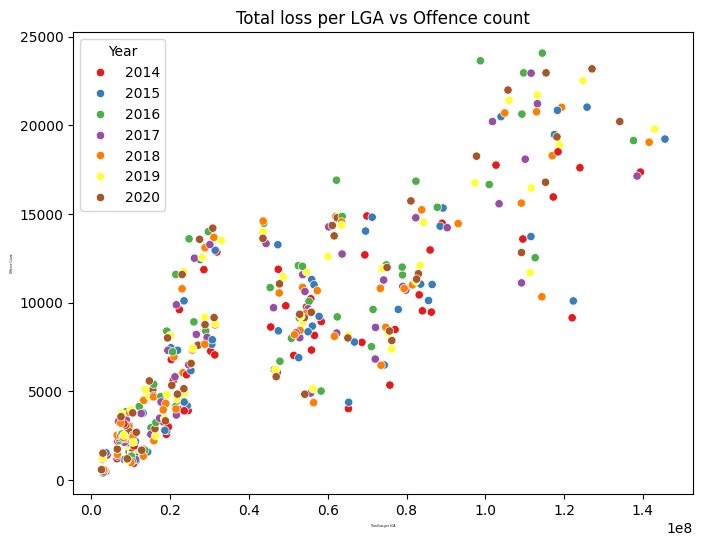

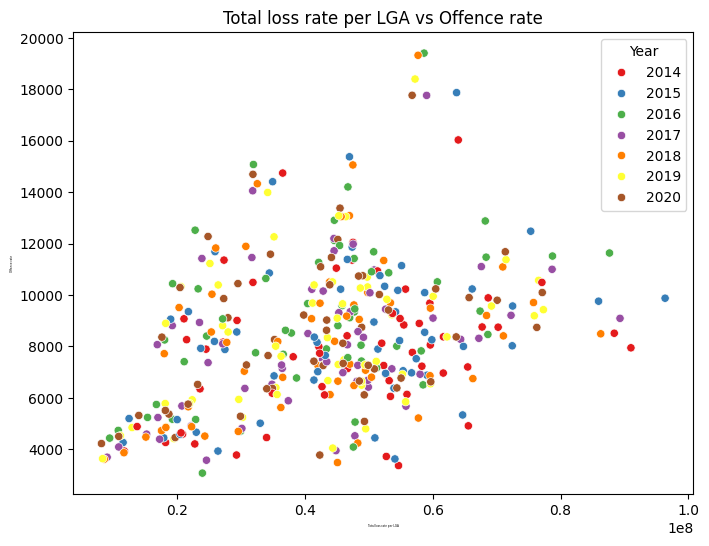

Year
2014    0.973804
2015    0.994619
2016    1.019397
2017    1.040310
2018    1.060052
2019    1.079054
2020    1.092178
Name: population, dtype: float64


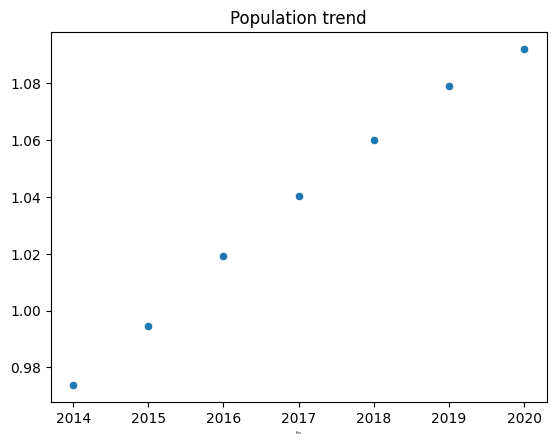

[[1.        0.8589164]
 [0.8589164 1.       ]]
[[1.        0.3482893]
 [0.3482893 1.       ]]


In [65]:
# Trend analysis - EGM loss and offence count
# Plot EGM loss per person against offence count

egm_offence_data = {
    'Year': [],
    'loss': [],
    'offence_count': [],
    'lga': [],
    'offence_rate': [],
    'loss_rate': [],
    "population": []
}

for name, group in preProcess.egm.groupby('LGA Name'):
    # Ignore melbourne, since it's an outlier (probably because melbourne and city of melbourne is not the same thing)
    if name == "melbourne":
        continue
    for year in range(2014, 2021):
        offence_count = preProcess.offences[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name)]['Offence Count'].iloc[0]
        offence_rate = preProcess.offences[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name)]['Rate per 100,000 population'].iloc[0]
        population = offence_count/offence_rate
        loss = group[str(year - 3)].sum()

        egm_offence_data['Year'].append(year)
        egm_offence_data['lga'].append(name)
        egm_offence_data['loss'].append(loss)
        egm_offence_data['offence_count'].append(offence_count)
        egm_offence_data['offence_rate'].append(offence_rate)
        egm_offence_data['loss_rate'].append(loss/population)
        egm_offence_data['population'].append(population)

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_count', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

# Add labels and title
plt.xlabel('Total loss per LGA')
plt.ylabel('Offence Count')
plt.title('Total loss per LGA vs Offence count')

# Show the plot
plt.show()

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss_rate', y='offence_rate', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

# Add labels and title
plt.xlabel('Total loss rate per LGA')
plt.ylabel('Offence rate')
plt.title('Total loss rate per LGA vs Offence rate')

# Show the plot
plt.show()

# Plot population
egm_frame = pd.DataFrame(egm_offence_data)
egm_group = egm_frame.groupby("Year")["population"].mean()
print(egm_group)
plt.figure()
plt.title("Population trend")
sns.scatterplot(x=egm_group.index, y=egm_group.values)
plt.show()

print(np.corrcoef(egm_offence_data['loss'], egm_offence_data['offence_count']))
print(np.corrcoef(egm_offence_data['loss_rate'], egm_offence_data['offence_rate']))

In [25]:
# x_axis = [i for i in range(2014, 2021)]
# for index, row in preProcess.egm.iterrows():
#     plt.figure()
#     plt.title(row["LGA Name"])
#     plt.plot(x_axis, row[[str(x) for x in x_axis]], 'o')